# Final Project 
### Heather Chen
#### 1. Import the data uploaded on S3

In [ ]:
spark

In [1]:
sc.install_pypi_package("boto3")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1607702121291_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
#Get the names and sizes of these data files using Amazon boto3
import boto3

s3 = boto3.resource('s3')
bucket = 'aws-emr-resources-787469208957-us-east-1'
bucket_resource = s3.Bucket(bucket)
file_sizes = []
file_names = []

for obj in bucket_resource.objects.all():
    if 'gdelt_data' in obj.key and 'bq-results' in obj.key:
        print(obj.last_modified,"\t", round(obj.size * 1e-6), "MB\t",
              obj.key, "\n")
        file_sizes.append(obj.size * 1e-6)
        file_names.append(obj.key)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2020-12-07 14:46:28+00:00 	 4 MB	 gdelt_data/bq-results-0107.csv 

2020-12-07 14:45:53+00:00 	 4 MB	 gdelt_data/bq-results-0108.csv 

2020-12-07 14:47:16+00:00 	 9 MB	 gdelt_data/bq-results-0109.csv 

2020-12-07 14:46:30+00:00 	 6 MB	 gdelt_data/bq-results-0110.csv 

2020-12-07 14:46:04+00:00 	 6 MB	 gdelt_data/bq-results-0111.csv 

2020-12-07 14:49:53+00:00 	 2 MB	 gdelt_data/bq-results-0112.csv 

2020-12-07 14:50:25+00:00 	 7 MB	 gdelt_data/bq-results-0113.csv 

2020-12-07 14:50:13+00:00 	 6 MB	 gdelt_data/bq-results-0114.csv 

2020-12-07 14:50:22+00:00 	 6 MB	 gdelt_data/bq-results-0115.csv 

2020-12-07 14:51:03+00:00 	 10 MB	 gdelt_data/bq-results-0116.csv 

2020-12-07 14:49:21+00:00 	 20 MB	 gdelt_data/bq-results-0117.csv 

2020-12-07 14:50:40+00:00 	 17 MB	 gdelt_data/bq-results-0118.csv 

2020-12-07 14:50:24+00:00 	 10 MB	 gdelt_data/bq-results-0119.csv 

2020-12-07 14:49:22+00:00 	 41 MB	 gdelt_data/bq-results-0120.csv 

2020-12-07 14:49:21+00:00 	 99 MB	 gdelt_data/bq-results-

In [3]:
#Then read these data files to spark dataframe
df_list = []
for filename in file_names:
    df = spark.read.csv('s3://aws-emr-resources-787469208957-us-east-1/' + filename, header=True)
    df_list.append(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
#Show the structure of these data files
df_list[0].printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- DateTime: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- SharingImage: string (nullable = true)
 |-- LangCode: string (nullable = true)
 |-- DocTone: string (nullable = true)
 |-- DomainCountryCode: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Lon: string (nullable = true)
 |-- CountryCode: string (nullable = true)
 |-- Adm1Code: string (nullable = true)
 |-- Adm2Code: string (nullable = true)
 |-- GeoType: string (nullable = true)
 |-- ContextualText: string (nullable = true)
 |-- GeoCoord: string (nullable = true)

#### 2. How the volume of news about covid-19 has changed?

In [5]:
#If looking at the size of these data files
#First import pandas
sc.install_pypi_package("pandas")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
sc.install_pypi_package("matplotlib")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

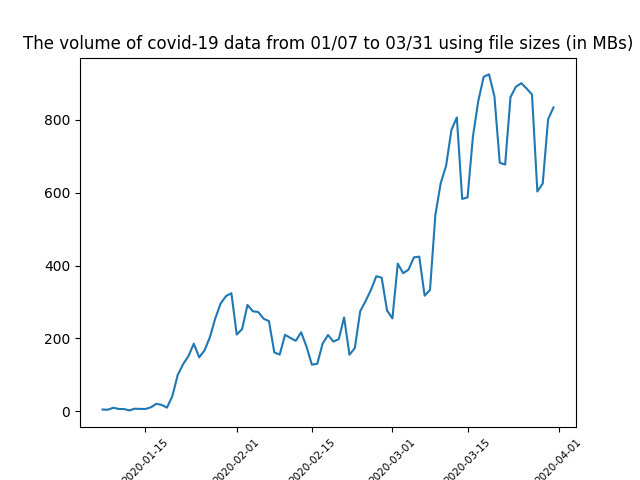

In [7]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

date_range = pd.date_range(start="2020-01-07",end="2020-03-31")
plt.plot(date_range, file_sizes)
plt.title("The volume of covid-19 data from 01/07 to 03/31 using file sizes (in MBs)")
plt.locator_params(axis='x', nbins=20)
plt.xticks(rotation='45', size='7.5')
plt.show()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

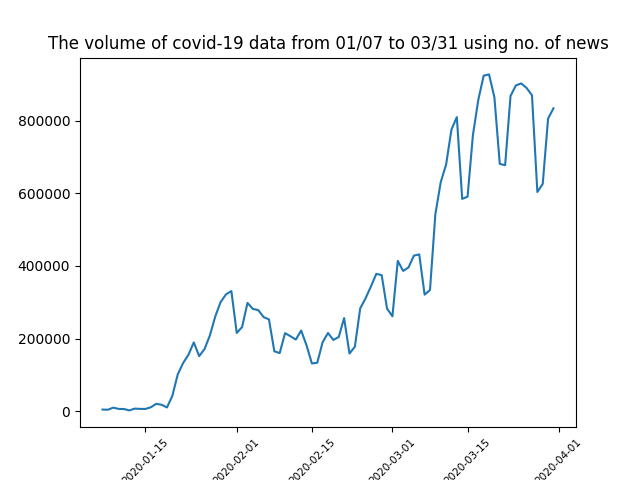

In [8]:
#If looking at the number of news within each datafile
num_news = []
for file in df_list:
    num_news.append(file.count())

plt.close()
plt.plot(date_range, num_news)
plt.title("The volume of covid-19 data from 01/07 to 03/31 using no. of news")
plt.locator_params(axis='x', nbins=20)
plt.xticks(rotation='45', size='7.5')
plt.show()
%matplot plt

#### 3. Which countries report covid-19 news most often?

In [9]:
#Get the count of countries within each datafile
country_df_list = []
no_countries = []
for file in df_list:
    country_df = file.groupby('CountryCode').count()
    country_df_list.append(country_df)
    no_countries.append(country_df.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

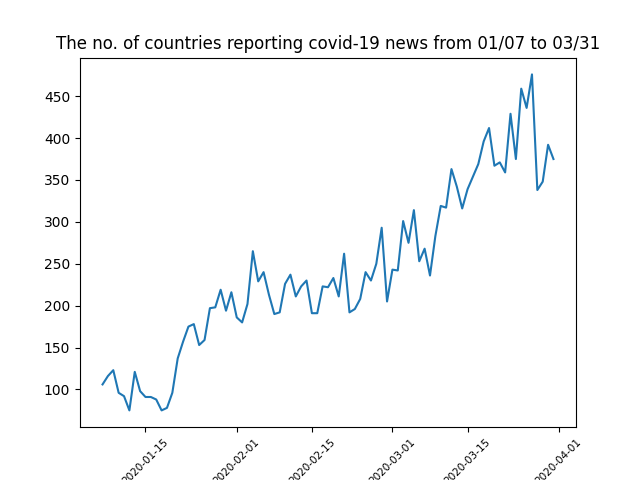

In [10]:
#Plot the number of countries
plt.close()
plt.plot(date_range, no_countries)
plt.title("The no. of countries reporting covid-19 news from 01/07 to 03/31")
plt.locator_params(axis='x', nbins=20)
plt.xticks(rotation='45', size='7.5')
plt.show()
%matplot plt

In [11]:
#Now select some countries of interest to see their number of reporting news
#Here we select CH(China), US, UK, JP(Japan), BR(Brazil), and IN(India)
def get_num_news_for_country(country):
    country_newsNo = []
    for file in country_df_list:
        try:
            no_news = file.filter(file.CountryCode==country).collect()[0]['count']
            country_newsNo.append(no_news)
        except IndexError:
            country_newsNo.append(0)
    return country_newsNo

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
CH_newsNo = get_num_news_for_country('CH')
US_newsNo = get_num_news_for_country('US')
UK_newsNo = get_num_news_for_country('UK')
BR_newsNo = get_num_news_for_country('BR')
IN_newsNo = get_num_news_for_country('IN')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

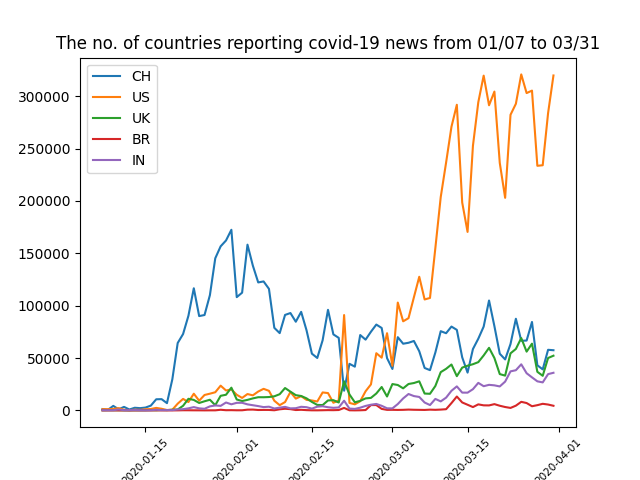

In [13]:
#Plot the number of news for each countries
plt.close()
plt.plot(date_range, CH_newsNo, label='CH')
plt.plot(date_range, US_newsNo, label='US')
plt.plot(date_range, UK_newsNo, label='UK')
plt.plot(date_range, BR_newsNo, label='BR')
plt.plot(date_range, IN_newsNo, label='IN')
plt.legend()
plt.title("The no. of countries reporting covid-19 news from 01/07 to 03/31")
plt.locator_params(axis='x', nbins=20)
plt.xticks(rotation='45', size='7.5')
plt.show()
%matplot plt